# Loops & Orbits &mdash; Week 3 &mdash; Day 2

## Solow-Swan Model of Economic Growth

For the first couple of days of this week, we are continuing our change-up from mechanics problems to show 
what huge applicability the methods you have been learning in this course have. Yesterday we did battery-charging.
Today we are doing economics.

### *Notebook by Prof. Andr&aacute;s Margitay-Becht*

Prof. Margitay-Becht presented the Solow-Swan economic model. Let's review the terms and units used to quantify the model.

### Terms

An economy has a certain amount of:

* GDP, Y &mdash; which in an advanced economy is a function of how much capital is in operation
* capital, K &mdash; you can remember what that stands for because Karl Marx spelled *Das Kapital* with a K &mdash; this is the amount of machinery for production &mdash; such as silicon wafer fabrication lines, lithium-ion battery factories or cranes to build buildings
* investment in additional capital, I &mdash; known as savings
* depreciation of capital, D, &mdash; depreciation is due to aging of the capital stock
* time, T &mdash; capital T in this notebook is the same as the lower-case t we have been using in our physics models &mdash; economists like capital letters for their variables

(GDP stands for Gross Domestic Product and is the rate of production of goods and services.)

### Units

If we were applying this to something like the State of California, to make the ideas more concrete you can imagine that the units are:

* Y, millions of USD / year
* K, millions of USD
* I, millions of USD / year
* D, millions of USD / year
* T, years

(USD is the currency code for United States Dollars. Example currency codes you might run into in economics texts are CAD for Canadian dollar, EUR for Euro, JPY for Japanese Yen, or RMB for Chinese Renminbi.)

Whatever units you are using, K is an amount, and Y, I, and D are amounts per time.

### Visualizations

#### 1. Dependency on K

We want to visualize how Y, I, and D depend on K in this model. *The graphs in that visualization will not depend on time.* They will depend on K.

#### 2. Dependency on T

We want to start an economy out at a certain size and be able to see (for example over the next 100 years), how that economy will grow. The most important measure of growth is Y, but we might want to visualize the annual percentage change in Y, or we might want to visualize how much capital, K, the economy has.

**In the next cell just execute the imports.** There is nothing in this cell for you to work on.

In [1]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each economic function:
import unittest

## Constants For the Model

The following constants go into the model equations.

**Just execute the assignments.** There is nothing in this cell for you to work on except to **notice what constants are available to be used in your model equations.**

In [2]:
# Define the starting size of the economy
capital = 1000.0 # so this economy starts with 1 billion in capital if the units are millions of USD

# Define the factors controlling the rates of change
production_rate = 5.0  # lower-case p in the equations on the board
depreciation_rate = 0.01 # lower-case delta (nothing to do with delta_t!) in the equations on the board
savings_rate = 0.25 # lower-case s in the equations on the board

# Define simulation time -- we are going to do 100 steps of 1 year each -- total 100 years
simulation_time_steps = 100 
delta_T = 1.0 # time step in years

## The Model Functions

Remind Prof. Margitay-Becht or Prof. Hill to put the model functions on the board if they are not already.

This first function involves a square root. Use `np.sqrt()` not the `sqrt()` function from the math library. The reason is the same as the reason we used `np.exp()` in the battery-charging notebook: the numpy versions of the math functions can take an entire ndarray as an argument; the math library versions can only take a single float as an argument.

**You need to implement the three model functions.** When the functions are right the unit tests will pass.

In [3]:
# The production function of the economy
def production_function(K):
    output = production_rate * np.sqrt(K)
    return output

# Loss of capital due to depreciation
def depreciation(K):
    delta = K * depreciation_rate
    return delta

# Accumulation of capital due to savings
def investment(Y):
    I = Y * savings_rate
    return I

### Unit tests ###

class EconomicFunctionTests(unittest.TestCase):
    
    def test_production_function_K_of_1(self):
        self.assertAlmostEqual(production_function(1.0), production_rate)

    def test_production_function_K_of_100(self):
        self.assertAlmostEqual(production_function(100.0), 10.0 * production_rate)
        
    def test_depreciation_K_of_0(self):
        self.assertAlmostEqual(depreciation(0.0), 0.0)

    def test_depreciation_K_of_99(self):
        self.assertAlmostEqual(depreciation(99.0), 99.0 * depreciation_rate)

    def test_investment_Y_of_0(self):
        self.assertAlmostEqual(investment(0.0), 0.0)

    def test_investment_Y_of_99(self):
        self.assertAlmostEqual(investment(99.0), 99.0 * savings_rate)


testSuite = unittest.TestLoader().loadTestsFromName("__main__.EconomicFunctionTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)

test_depreciation_K_of_0 (__main__.EconomicFunctionTests) ... ok
test_depreciation_K_of_99 (__main__.EconomicFunctionTests) ... ok
test_investment_Y_of_0 (__main__.EconomicFunctionTests) ... ok
test_investment_Y_of_99 (__main__.EconomicFunctionTests) ... ok
test_production_function_K_of_1 (__main__.EconomicFunctionTests) ... ok
test_production_function_K_of_100 (__main__.EconomicFunctionTests) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Visualization 1 &mdash; Dependency on K

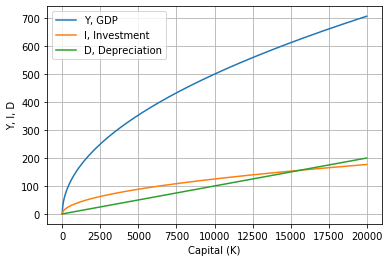

In [4]:
# The 1st visualization is a function of K!
Ks_to_plot = np.arange(0, 20000, 10)
Ys_to_plot = production_function(Ks_to_plot)

# You! Figure out the right Is_to_plot and Ds_to_plot
Is_to_plot = investment(Ys_to_plot)
Ds_to_plot = depreciation(Ks_to_plot)

plt.plot(Ks_to_plot, Ys_to_plot)
plt.plot(Ks_to_plot, Is_to_plot)
plt.plot(Ks_to_plot, Ds_to_plot)

plt.xlabel("Capital (K)")
plt.ylabel("Y, I, D")
plt.legend(("Y, GDP", "I, Investment", "D, Depreciation"))
plt.grid()
plt.show()

## Execute the Model

**Various pieces to implement are marked `# You!`**

In [5]:
# Time trajectory of growth

# Use the np functions to pre-allocate all of our variables
Ys = np.zeros((simulation_time_steps + 1,))
Ts = np.zeros((simulation_time_steps + 1,))
Ks = np.zeros((simulation_time_steps + 1,))
growths = np.zeros((simulation_time_steps + 1,))

# Set the initial K and Y 
Ks[0] = capital
Ys[0] = production_function(capital)

# The for loop that does the main work
for i in range(1, simulation_time_steps + 1):
    before_K = Ks[i - 1]
    before_Y = Ys[i - 1]
    before_T = Ts[i - 1]
    
    after_K = before_K + investment(before_Y) - depreciation(before_K)
    after_Y = production_function(after_K)
    growth = (after_Y - before_Y) / before_Y
    after_T = before_T + delta_T
    
    Ks[i] = after_K
    Ys[i] = after_Y
    growths[i] = growth
    Ts[i] = after_T

## Visualization 2a &mdash; Dependency of Y (GDP) on T

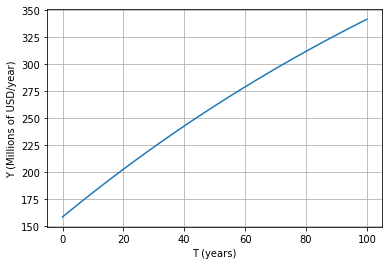

In [6]:
# Plot GDP by time
plt.plot(Ts, Ys)
plt.xlabel("T (years)")
plt.ylabel("Y (Millions of USD/year)")
plt.grid()
plt.show()

## Visualization 2b &mdash; Dependency of Growth of Y on T

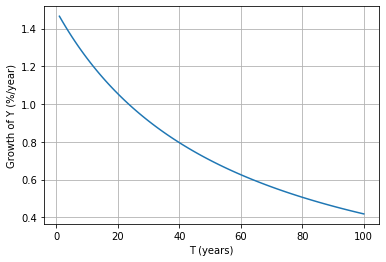

In [7]:
# Plot growth rate by time
# The 0th entry in the growths array doesn't make sense -- because there wasn't a prior growth
Ts_deleted0 = np.delete(Ts, 0)
growths_deleted0 = np.delete(growths, 0)
plt.plot(Ts_deleted0, growths_deleted0 * 100)
plt.xlabel("T (years)")
plt.ylabel("Growth of Y (%/year)")
plt.grid()
plt.show()

## Conclusion

Ben and Brian will be running around helping people.

Prof. Margitay-Becht will have the final checkout question for each table about interpreting the model.

If you are interested in finance and economics for your final project, you should ask him about specific ways
for making this model more realistic.